In [1]:
import pandas as pd

## Loading Lightning Error

In [2]:
lightning_error = pd.read_csv("data/Salesforce/Salesforce/ELF/LightningError/2022-06-05_LightningError.csv")

In [3]:
lightning_error.shape

(1286, 39)

In [4]:
# Remove missing values in any of the following columns 
lightning_error = lightning_error.dropna(subset = ['PAGE_URL'])
#lightning_error = [PAGE_URL for PAGE_URL in lightning_error if not(pd.isnull(PAGE_URL)) == True]

In [5]:
lightning_error.shape

(1282, 39)

## Loading Active Reports

In [6]:
active_reports = pd.read_csv("datasets/active_reports.csv")

Getting ***Report_Id*** by ***Page_Url***

In [7]:
run_report_api_resource = "/lightning/r/"

def get_report_info_from_endpoint(page_url):
    if not(pd.isnull(page_url)) == True: 
        if page_url.startswith(run_report_api_resource):
            uri = page_url.split(run_report_api_resource)
            if len(uri) >= 2:
                report_type, report_id_derived = uri[1].split("/")[:2]
                return report_type, report_id_derived

In [8]:
lightning_error.shape

(1282, 39)

In [9]:
lightning_error['REPORT_INFO_DERIVED'] = lightning_error.PAGE_URL.apply(get_report_info_from_endpoint)

In [10]:
lightning_error['REPORT_TYPE_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[0]

In [11]:
lightning_error['REPORT_ID_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[1]

In [12]:
lightning_error.shape

(1282, 42)

## Merging Lightning Error and Active Reports

In [13]:
ltng_full_reports = pd.merge(left=active_reports, right=lightning_error, left_on="Id", right_on="REPORT_ID_DERIVED")

In [14]:
list(ltng_full_reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE_x',
 'TIMESTAMP_x',
 'REQUEST_ID_x',
 'ORGANIZATION_ID_x',
 'USER_ID_x',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY_x',
 'LOGIN_KEY_x',
 'USER_TYPE_x',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED_x',
 'USER_ID_DERIVED_x',
 'CLIENT_IP_x',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED_x',
 'ORIGIN',
 'IsActive',
 'EVENT_TYPE_y',
 'TIMESTAMP_y',
 'REQUEST_ID_y',
 'ORGANIZATION_ID_y',
 'USER_ID_y',
 'CLIENT_ID',
 'SESSION_KEY_y',
 'LOGIN_KEY_y',
 'USER_TYPE_y',
 'APP_NAME',

Removing useless columns

In [15]:
ltng_full_reports = ltng_full_reports.drop(columns=['CreatedById', 'CreatedDate', 'Description', 
                                'DeveloperName', 'FolderName', 'Format', 'Id', 'IsDeleted', 
                                'LastModifiedById', 'LastModifiedDate', 'LastReferencedDate', 'LastRunDate', 'LastViewedDate',
                                'Name','NamespacePrefix','OwnerId',
                                'ReportTypeApiName', 'SystemModstamp',
                                'EVENT_TYPE_x', 'TIMESTAMP_x', 'REQUEST_ID_x', 
                                'ORGANIZATION_ID_x', 'USER_ID_x',
                                'RUN_TIME', 'CPU_TIME', 'URI',
                                'SESSION_KEY_x', 'LOGIN_KEY_x', 'USER_TYPE_x', 'REQUEST_STATUS',
                                'DB_TOTAL_TIME', 'ENTITY_NAME',
                                'DISPLAY_TYPE', 'RENDERING_TYPE',
                                'REPORT_ID', 'ROW_COUNT',
                                'NUMBER_EXCEPTION_FILTERS', 'NUMBER_COLUMNS',
                                'AVERAGE_ROW_SIZE', 'SORT',
                                'DB_BLOCKS', 'DB_CPU_TIME',
                                'NUMBER_BUCKETS',
                                'USER_ID_DERIVED_x', 'CLIENT_IP_x', 'URI_ID_DERIVED',
                                'ORIGIN', 'IsActive',
                                'EVENT_TYPE_y', 'TIMESTAMP_y',
                                'REQUEST_ID_y', 'ORGANIZATION_ID_y', 'USER_ID_y', 'CLIENT_ID',
                                'SESSION_KEY_y', 'LOGIN_KEY_y', 'USER_TYPE_y',
                                'APP_NAME', 'DEVICE_PLATFORM', 'SDK_APP_VERSION',
                                'OS_NAME', 'OS_VERSION', 'USER_AGENT',
                                'BROWSER_NAME', 'BROWSER_VERSION',
                                'SDK_VERSION', 'DEVICE_MODEL', 'DEVICE_ID',
                                'SDK_APP_TYPE', 'CLIENT_GEO', 'CONNECTION_TYPE',
                                'UI_EVENT_TIMESTAMP', 'PAGE_START_TIME', 'DEVICE_SESSION_ID', 'UI_EVENT_SEQUENCE_NUM',
                                'PAGE_ENTITY_ID', 'PAGE_URL', 'PAGE_APP_NAME', 'COMPONENT_NAME',
                                'TIMESTAMP_DERIVED_y', 'USER_ID_DERIVED_y', 'CLIENT_IP_y',
                                'REPORT_INFO_DERIVED', 'REPORT_TYPE_DERIVED', 'REPORT_ID_DERIVED_y'])

In [16]:
ltng_full_reports.shape

(13369, 7)

Renaming ***TIMESTAMP_DERIVED_x*** to ***TIMESTAMP_DERIVED***

In [17]:
ltng_full_reports.rename(columns={'TIMESTAMP_DERIVED_x': 'TIMESTAMP_DERIVED'}, inplace = True)

Renaming ***REPORT_ID_DERIVED_x*** to ***REPORT_ID_DERIVED***

In [18]:
ltng_full_reports.rename(columns={'REPORT_ID_DERIVED_x': 'REPORT_ID_DERIVED'}, inplace = True)

In [19]:
ltng_full_reports.head()

,TIMESTAMP_DERIVED,REPORT_ID_DERIVED,UI_EVENT_ID,UI_EVENT_TYPE,UI_EVENT_SOURCE,PAGE_ENTITY_TYPE,PAGE_CONTEXT
0,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase
1,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,Error,Report,reports:reportBase
2,2022-06-04T10:03:35.475Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase
3,2022-06-04T10:03:35.475Z,00O0b000004kTazEAE,ltng:error,error,Error,Report,reports:reportBase
4,2022-06-04T10:03:09.901Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase


In [20]:
import re

pageview_logs = pd.read_csv("data/Salesforce/Salesforce/ELF/LightningPageView/2022-06-05_LightningPageView.csv", 
                            low_memory=False)
interest_columns = ['PAGE_URL', 'DURATION', 'EFFECTIVE_PAGE_TIME']
pageview_ept = pageview_logs[interest_columns]

#Getting Report_Id by Page_Url
pageview_ept = pageview_ept.dropna(subset = ['PAGE_URL'])

run_report_api_resource = "/lightning/r/"

def get_report_info_from_endpoint(page_url):
    if not(pd.isnull(page_url)) == True: 
        if page_url.startswith(run_report_api_resource):
            uri = page_url.split(run_report_api_resource)
            if len(uri) >= 2:
                report_type, report_id_derived = uri[1].split("/")[:2]
                return report_type, report_id_derived

pageview_ept['REPORT_INFO_DERIVED'] = pageview_ept.PAGE_URL.apply(get_report_info_from_endpoint)
pageview_ept['REPORT_TYPE_DERIVED'] = pageview_ept.REPORT_INFO_DERIVED.str[0]
pageview_ept['REPORT_ID_DERIVED'] = pageview_ept.REPORT_INFO_DERIVED.str[1]

pageview_ept = pageview_ept.dropna(subset=['REPORT_ID_DERIVED'])
pageview_ept = pageview_ept[pageview_ept.EFFECTIVE_PAGE_TIME.isna()]
pageview_ept = pageview_ept[pageview_ept.DURATION > 60000] # 60s -> 60000ms

pageview_ept.head()

,PAGE_URL,DURATION,EFFECTIVE_PAGE_TIME,REPORT_INFO_DERIVED,REPORT_TYPE_DERIVED,REPORT_ID_DERIVED
890,/lightning/r/Call_Transcript__c/a7Z2R000002Q33...,166655.0,NaN,"(Call_Transcript__c, a7Z2R000002Q33NUAS)",Call_Transcript__c,a7Z2R000002Q33NUAS
1843,/lightning/r/Report/00O0b000006iNwdEAE/view,129212.0,NaN,"(Report, 00O0b000006iNwdEAE)",Report,00O0b000006iNwdEAE
2363,/lightning/r/WorkOrder/0WO6P00000273YqWAI/view...,70994.0,NaN,"(WorkOrder, 0WO6P00000273YqWAI)",WorkOrder,0WO6P00000273YqWAI
3254,/lightning/r/Contact/0036P000004Rl3nQAC/view?w...,68522.0,NaN,"(Contact, 0036P000004Rl3nQAC)",Contact,0036P000004Rl3nQAC
4340,/lightning/r/Task/00T6P00000HboKyUAJ/view?ws=%...,92596.0,NaN,"(Task, 00T6P00000HboKyUAJ)",Task,00T6P00000HboKyUAJ


In [21]:
active_and_problematic_reports = pd.merge(left=ltng_full_reports, right=pageview_ept, on='REPORT_ID_DERIVED')

In [22]:
active_and_problematic_reports.shape

(287255, 12)

In [23]:
active_and_problematic_reports.head()

,TIMESTAMP_DERIVED,REPORT_ID_DERIVED,UI_EVENT_ID,UI_EVENT_TYPE,UI_EVENT_SOURCE,PAGE_ENTITY_TYPE,PAGE_CONTEXT,PAGE_URL,DURATION,EFFECTIVE_PAGE_TIME,REPORT_INFO_DERIVED,REPORT_TYPE_DERIVED
0,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,60051.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
1,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,61267.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
2,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase,/lightning/r/Report/00O0b000004kTazEAE/view,333616.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
3,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase,/lightning/r/Report/00O0b000004kTazEAE/view,112760.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
4,2022-06-04T10:03:23.349Z,00O0b000004kTazEAE,ltng:error,error,TypeError,Report,reports:reportBase,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,62413.0,NaN,"(Report, 00O0b000004kTazEAE)",Report


---

## Analyzing the pages that generate more errors

In [24]:
active_and_problematic_reports['PAGE_ENTITY_TYPE'].unique()

array(['Report'], dtype=object)

There is only one type of page in the dataset **[Report]**

---

## Analyzing the components that generate errors

In [25]:
active_and_problematic_reports['PAGE_CONTEXT'].unique()

array(['reports:reportBase'], dtype=object)

There is only one type of component in the dataset **[reports:reportBase]**

---

## Getting the hours of the day that more erros occurred

Converting ***TIMESTAMP_DERIVED*** from *str* to type *date*

In [26]:
type(active_and_problematic_reports['TIMESTAMP_DERIVED'][0])

str

In [27]:
import datetime
from datetime import date

active_and_problematic_reports['TIMESTAMP_DERIVED'] = pd.to_datetime(active_and_problematic_reports['TIMESTAMP_DERIVED']
                                                                     , infer_datetime_format=True)

In [28]:
type(active_and_problematic_reports['TIMESTAMP_DERIVED'][0])

pandas._libs.tslibs.timestamps.Timestamp

Getting the hours from ***TIMESTAMP_DERIVED*** column

In [29]:
hour_rows = []

for i in active_and_problematic_reports.index:
    hour_rows.append(active_and_problematic_reports['TIMESTAMP_DERIVED'][i].hour)

In [30]:
len(hour_rows)

287255

Creating a column with the hour data

In [31]:
active_and_problematic_reports['TIMESTAMP_DERIVED_HOUR'] = hour_rows

In [32]:
list(active_and_problematic_reports.columns)

['TIMESTAMP_DERIVED',
 'REPORT_ID_DERIVED',
 'UI_EVENT_ID',
 'UI_EVENT_TYPE',
 'UI_EVENT_SOURCE',
 'PAGE_ENTITY_TYPE',
 'PAGE_CONTEXT',
 'PAGE_URL',
 'DURATION',
 'EFFECTIVE_PAGE_TIME',
 'REPORT_INFO_DERIVED',
 'REPORT_TYPE_DERIVED',
 'TIMESTAMP_DERIVED_HOUR']

Getting a count of erros by hour

In [33]:
active_and_problematic_reports_group = active_and_problematic_reports.groupby([
    'TIMESTAMP_DERIVED_HOUR']).agg({'UI_EVENT_ID': 'count'})

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [34]:
active_and_problematic_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [35]:
active_and_problematic_reports_group.head()

,UI_EVENT_ID_COUNT
TIMESTAMP_DERIVED_HOUR,
0,20070
1,12230
2,9348
3,12042
4,9668


Reseting index

In [36]:
active_and_problematic_reports_group = active_and_problematic_reports_group.reset_index()

In [37]:
active_and_problematic_reports_group

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,20070
1,1,12230
2,2,9348
3,3,12042
4,4,9668
5,5,8862
6,6,6615
7,7,6415
8,8,7926
9,9,7994


Getting the data

In [38]:
list_of_hour = active_and_problematic_reports_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_id_count = active_and_problematic_reports_group['UI_EVENT_ID_COUNT'].tolist()

Graph relating the number of errors and the hour of the day

In [39]:
import numpy as np
import matplotlib.pyplot as plt

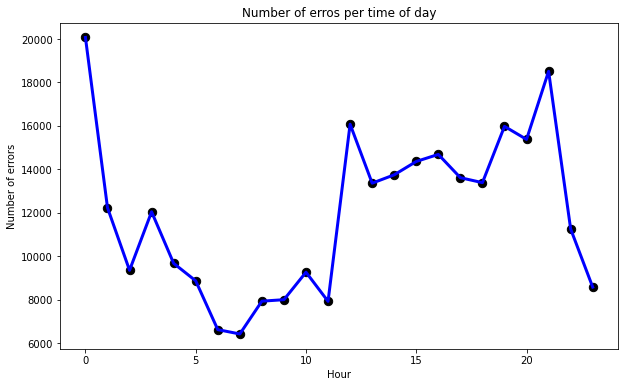

In [40]:
plt.figure(figsize=(10, 6))
plt.title("Number of erros per time of day")
plt.xlabel("Hour")
plt.ylabel("Number of errors")
plt.scatter(list_of_hour, list_of_ui_event_id_count, label = "Number of errors", color = "black", s =
70)
plt.plot(list_of_hour, list_of_ui_event_id_count, color = "blue", linestyle = "-", linewidth = 3)

### Getting the top hours data

Sorting by count

In [41]:
active_and_problematic_reports_group_sorted = active_and_problematic_reports_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [42]:
active_and_problematic_reports_group_sorted

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,20070
21,21,18512
12,12,16076
19,19,15976
20,20,15376
16,16,14684
15,15,14360
14,14,13744
17,17,13612
18,18,13384


Getting top hours

In [43]:
number_of_top_hours = 5

top_hours = active_and_problematic_reports_group_sorted.head(number_of_top_hours)

In [44]:
top_hours

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,20070
21,21,18512
12,12,16076
19,19,15976
20,20,15376


Sorting by hours

In [45]:
top_hours = top_hours.sort_values(by=['TIMESTAMP_DERIVED_HOUR'])

In [46]:
top_hours

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,20070
12,12,16076
19,19,15976
20,20,15376
21,21,18512


Reseting index

In [47]:
top_hours = top_hours.reset_index()

In [48]:
top_hours

,index,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,0,20070
1,12,12,16076
2,19,19,15976
3,20,20,15376
4,21,21,18512


Result

In [49]:
top_hours_values = []

print("The top hours are: ", end="")
for i in top_hours.index:
    value = top_hours['TIMESTAMP_DERIVED_HOUR'][i]
    
    top_hours_values.append(value)
    
    if i == len(top_hours) - 1:
        print(f"{value}", end="")
    elif i == len(top_hours) - 2:
        print(f"{value} and ", end="")
    else:
        print(f"{value}, ", end="")

The top hours are: 0, 12, 19, 20 and 21

---

## Analyzing the most common error types by day

Getting the count of erros for each type of error

In [50]:
active_and_problematic_reports_group = active_and_problematic_reports.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [51]:
active_and_problematic_reports_group.shape

(2, 1)

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [52]:
active_and_problematic_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [53]:
active_and_problematic_reports_group

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,146830
TypeError,140425


Sorting the data by ***UI_EVENT_ID_COUNT***

In [54]:
active_and_problematic_reports_group = active_and_problematic_reports_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [55]:
active_and_problematic_reports_group

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,146830
TypeError,140425


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the day')

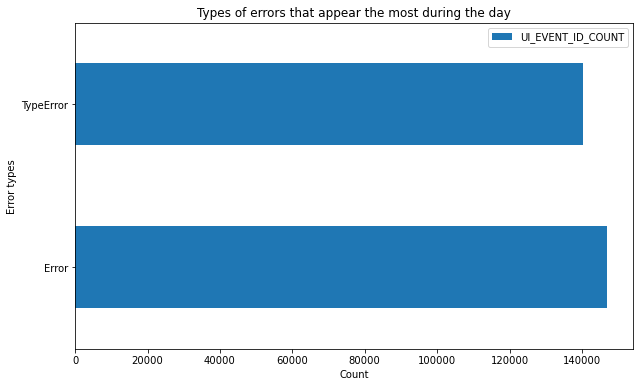

In [56]:
number_of_error_types_graph = 2

graph = active_and_problematic_reports_group.head(number_of_error_types_graph).plot.barh(figsize=(10, 6))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the day')

### Getting top error types by day

In [57]:
number_of_error_types = 2

top_error_types_by_day = active_and_problematic_reports_group.head(number_of_error_types)

In [58]:
top_error_types_by_day

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,146830
TypeError,140425


Reseting index

In [59]:
top_error_types_by_day = top_error_types_by_day.reset_index()

In [60]:
top_error_types_by_day

,UI_EVENT_SOURCE,UI_EVENT_ID_COUNT
0,Error,146830
1,TypeError,140425


Result

In [61]:
top_error_types_by_day_values = []

print(f"The top {number_of_error_types} error types by day are: ")

for i in top_error_types_by_day.index:
    value = top_error_types_by_day['UI_EVENT_SOURCE'][i]
    
    top_error_types_by_day_values.append(value)
    
    print(f"{i + 1} - {value}")

The top 2 error types by day are: 
1 - Error
2 - TypeError


---

## Analyzing the most common error types by peak time

Getting top hours values

In [62]:
top_hours_values

[0, 12, 19, 20, 21]

Filtering the data by top hours

In [63]:
active_and_problematic_reports.shape

(287255, 13)

In [64]:
filtered_active_and_problematic_reports = active_and_problematic_reports[active_and_problematic_reports
                                                                         .TIMESTAMP_DERIVED_HOUR.isin(top_hours_values)]

In [65]:
filtered_active_and_problematic_reports.shape

(86010, 13)

Grouping by ***UI_EVENT_SOURCE***

In [66]:
filtered_active_and_problematic_reports_group = filtered_active_and_problematic_reports.groupby([
    'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [67]:
filtered_active_and_problematic_reports_group.shape

(2, 1)

In [68]:
filtered_active_and_problematic_reports_group

,UI_EVENT_ID
UI_EVENT_SOURCE,
Error,43635
TypeError,42375


Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [69]:
filtered_active_and_problematic_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

Sorting by ***UI_EVENT_ID_COUNT***

In [70]:
filtered_active_and_problematic_reports_group_sorted = filtered_active_and_problematic_reports_group.sort_values(
    by=['UI_EVENT_ID_COUNT'], ascending=False)

In [71]:
filtered_active_and_problematic_reports_group_sorted

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,43635
TypeError,42375


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the peak time')

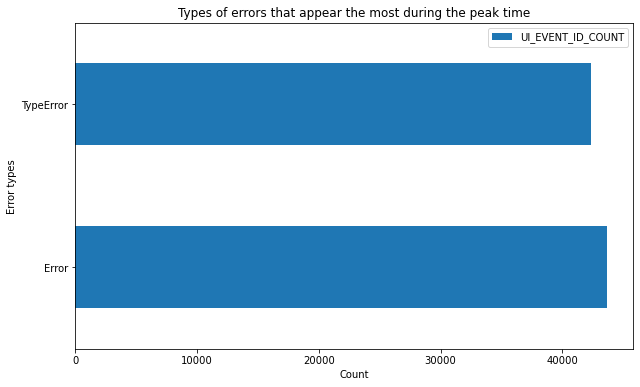

In [72]:
graph = filtered_active_and_problematic_reports_group_sorted.head(number_of_error_types_graph).plot.barh(figsize=(10, 6))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the peak time')

### Getting top error types by peak time

In [73]:
top_error_types_by_peak_time = filtered_active_and_problematic_reports_group_sorted.head(number_of_error_types)

In [74]:
top_error_types_by_peak_time

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,43635
TypeError,42375


Reseting index

In [75]:
top_error_types_by_peak_time = top_error_types_by_peak_time.reset_index()

Getting top page entity type values and showing result

In [76]:
top_error_types_by_peak_time_values = []

print(f"The top {number_of_error_types} error types by peak time are: ")
for i in top_error_types_by_peak_time.index:
    value = top_error_types_by_peak_time['UI_EVENT_SOURCE'][i]
    
    top_error_types_by_peak_time_values.append(value)
    print(f"{i + 1} - {value}")

The top 2 error types by peak time are: 
1 - Error
2 - TypeError


---

## Analyzing types of errors by peak time

Getting the count of erros for each group of type and hour

In [77]:
active_and_problematic_reports_group =active_and_problematic_reports.groupby(['TIMESTAMP_DERIVED_HOUR', 
                                                     'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [78]:
active_and_problematic_reports_group

UI_EVENT_ID
TIMESTAMP_DERIVED_HOUR UI_EVENT_SOURCE             
0                      Error                  10245
                       TypeError               9825
1                      Error                   6430
                       TypeError               5800
2                      Error                   5073
                       TypeError               4275
3                      Error                   6042
                       TypeError               6000
4                      Error                   4918
                       TypeError               4750
5                      Error                   4662
                       TypeError               4200
6                      Error                   3465
                       TypeError               3150
7                      Error                   3365
                       TypeError               3050
8                      Error                   4026
                       TypeError               3900
9                      Error                   4144
                       TypeError               3850
10                     Error                   4735
                       TypeError               4525
11                     Error                   4043
                       TypeError               3875
12                     Error                   8101
                       TypeError               7975
13                     Error                   6785
                       TypeError               6575
14                     Error                   7019
                       TypeError               6725
15                     Error                   7285
                       TypeError               7075
16                     Error                   7384
                       TypeError               7300
17                     Error                   7037
                       TypeError               6575
18                     Error                   6734
                       TypeError               6650
19                     Error                   8051
                       TypeError               7925
20                     Error                   7751
                       TypeError               7625
21                     Error                   9487
                       TypeError               9025
22                     Error                   5625
                       TypeError               5625
23                     Error                   4423
                       TypeError               4150

Reseting index

In [79]:
active_and_problematic_reports_group = active_and_problematic_reports_group.reset_index()

Getting the data for the visualization

In [80]:
list_of_hour = active_and_problematic_reports_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_source = active_and_problematic_reports_group['UI_EVENT_SOURCE'].tolist()
list_of_ui_event_id_count = active_and_problematic_reports_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [81]:
result = {}

In [82]:
def dictionary_format(list_types_of_erros, list_elements): 
    result = {}
    
    for element in list_elements:
        result[element] = []
        for i in range(len(list_types_of_erros)):
            result[element].append(0)
    
    return result

In [83]:
result = dictionary_format(top_error_types_by_peak_time_values, top_hours_values)

In [84]:
result

{0: [0, 0], 12: [0, 0], 19: [0, 0], 20: [0, 0], 21: [0, 0]}

Mapping the type of error to position

In [85]:
map_types = {}

In [86]:
def mapping_type_to_position(list_types_of_erros):
    for i in range(len(list_types_of_erros)):
        map_types[list_types_of_erros[i]] = i

In [87]:
mapping_type_to_position(top_error_types_by_peak_time_values)

In [88]:
map_types

{'Error': 0, 'TypeError': 1}

Getting the amount of errors for each type and time

In [89]:
def get_amount(list_types, list_of_all_types, list_elements, list_of_all_elements):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                if list_of_all_elements[i] in list_elements:
                    result[list_of_all_elements[i]][map_types[unique_type]] += list_of_ui_event_id_count[i]

In [90]:
get_amount(top_error_types_by_peak_time_values, list_of_ui_event_source, top_hours_values, list_of_hour)

In [91]:
result

{0: [10245, 9825],
 12: [8101, 7975],
 19: [8051, 7925],
 20: [7751, 7625],
 21: [9487, 9025]}

In [92]:
list_error = []
list_type_error = [] 

for error_count in result.values():
    list_error.append(error_count[0])
    list_type_error.append(error_count[1])

Viewing the data

In [93]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

Text(0, 0.5, 'Count of errors')

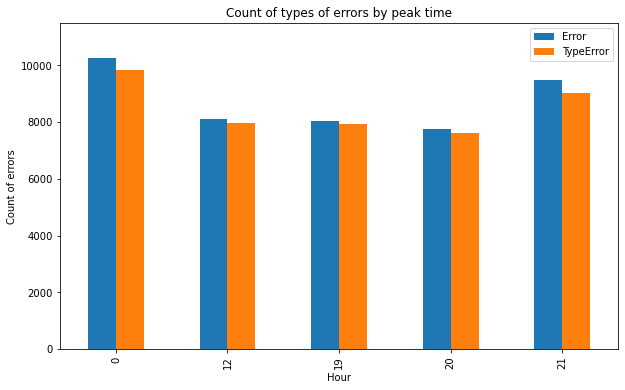

In [94]:
#survey(result, top_error_types_by_peak_time_values)
# plt.ylabel("Hour")
# plt.show()

df = pd.DataFrame({'Hour': top_hours_values, 'Error': list_error, 'TypeError': list_type_error})
# ax = df.plot(x="Hour", y="Error", kind="bar")
# df.plot(x="Hour", y="TypeError", kind="bar", ax=ax, color="maroon", figsize=(10, 6))
ax = df.plot(x="Hour", y=top_error_types_by_day_values, kind="bar", figsize=(10, 6), title='Count of types of errors by peak time', ylim=(0,11500))
ax.set_ylabel("Count of errors")

---

## Analyzing types of errors by day

Getting the intervals

In [95]:
list_of_unique_hour = active_and_problematic_reports_group['TIMESTAMP_DERIVED_HOUR'].unique()

In [96]:
number_of_intervals = 6

In [97]:
intervals = []

initial = 0
for i in range(number_of_intervals):
    final = initial + (len(list_of_unique_hour)//number_of_intervals - 1)
    intervals.append(f"{initial}-{final}")
    initial = final + 1

In [98]:
intervals_dict = {}

for interval in intervals:
    interval_values = interval.split("-")
    intervals_dict[interval] = [i for i in range(int(interval_values[0]), int(interval_values[1]) + 1)]

Getting the result dictionary format

In [99]:
result = dictionary_format(top_error_types_by_day_values, intervals)

In [100]:
result

{'0-3': [0, 0],
 '4-7': [0, 0],
 '8-11': [0, 0],
 '12-15': [0, 0],
 '16-19': [0, 0],
 '20-23': [0, 0]}

Mapping the type of error to position

In [101]:
mapping_type_to_position(top_error_types_by_day_values)

In [102]:
map_types

{'Error': 0, 'TypeError': 1}

Getting the amount of errors for each type and time

In [103]:
def get_amount_intervals(list_types, list_of_all_types, intervals, intervals_dict):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                for interval in intervals:
                    if list_of_hour[i] in intervals_dict[interval]:
                        result[interval][map_types[unique_type]] += list_of_ui_event_id_count[i]

In [104]:
get_amount_intervals(top_error_types_by_day_values, list_of_ui_event_source, intervals, intervals_dict)

In [105]:
result

{'0-3': [27790, 25900],
 '4-7': [16410, 15150],
 '8-11': [16948, 16150],
 '12-15': [29190, 28350],
 '16-19': [29206, 28450],
 '20-23': [27286, 26425]}

Viewing the data

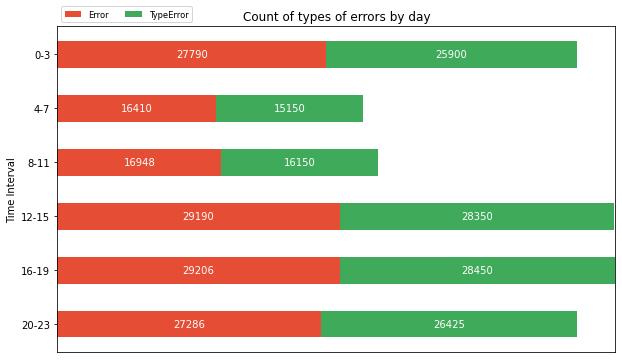

In [106]:
survey(result, top_error_types_by_day_values)
plt.title("Count of types of errors by day")
plt.ylabel("Time Interval")
plt.show()

---